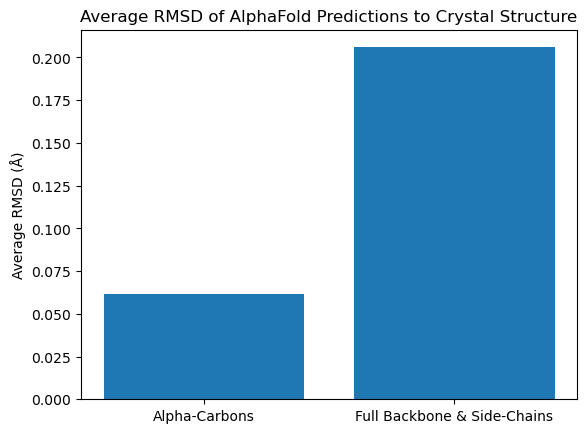

In [2]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load the AlphaFold prediction and crystal structure trajectories
alpha_traj = md.load('/home/yk3019/comp-lab-class-2023/Week7/colab/test_ce6c6_unrelaxed_rank_001_alphafold2_ptm_model_5_seed_000.pdb')  # Replace with the path to your AlphaFold predictions
crystal_traj = md.load('/home/yk3019/comp-lab-class-2023/Week7/Inputs/1lys.pdb')  # Replace with the path to your crystal structure


# Align the AlphaFold predictions to the crystal structure using alpha-carbons
alpha_traj_aligned = alpha_traj.superpose(crystal_traj, atom_indices=alpha_traj.top.select('name CA'))

# Calculate RMSD based on alpha-carbons
rmsd_alpha = md.rmsd(alpha_traj_aligned, crystal_traj, atom_indices=alpha_traj.top.select('name CA'))

# Align the AlphaFold predictions to the crystal structure using the full backbone and side-chains
alpha_traj_aligned = alpha_traj.superpose(crystal_traj, atom_indices=alpha_traj.top.select('protein'))

# Calculate RMSD based on the full backbone and side-chains
rmsd_all = md.rmsd(alpha_traj_aligned, crystal_traj, atom_indices=alpha_traj.top.select('protein'))

# Calculate the average RMSD for each measure
average_rmsd_alpha = np.mean(rmsd_alpha)
average_rmsd_all = np.mean(rmsd_all)

# Create a bar plot showing the average RMSD values
labels = ['Alpha-Carbons', 'Full Backbone & Side-Chains']
average_rmsd_values = [average_rmsd_alpha, average_rmsd_all]

plt.bar(labels, average_rmsd_values)
plt.ylabel('Average RMSD (Å)')
plt.title('Average RMSD of AlphaFold Predictions to Crystal Structure')
plt.show()




